In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
import os
os.chdir("/Users/pratham/Downloads")

In [3]:
df = pd.read_csv(
    'spotify.csv')

In [4]:
df.head(n=5)

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,TrackID,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,1,Havana,Camila Cabello,30948101,https://open.spotify.com/track/1rfofaqEpACxVEH...,1rfofaqEpACxVEHIZBJe6W,0.765,0.523,2,...,0.000036,0.1320,0.394,104.988,audio_features,spotify:track:1rfofaqEpACxVEHIZBJe6W,https://api.spotify.com/v1/tracks/1rfofaqEpACx...,https://api.spotify.com/v1/audio-analysis/1rfo...,217307,4
1,1,2,rockstar,Post Malone,27643632,https://open.spotify.com/track/7wGoVu4Dady5GV0...,7wGoVu4Dady5GV0Sv4UIsx,0.577,0.522,5,...,0.000090,0.1420,0.119,159.772,audio_features,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,https://api.spotify.com/v1/tracks/7wGoVu4Dady5...,https://api.spotify.com/v1/audio-analysis/7wGo...,218320,4
2,2,3,River (feat. Ed Sheeran),Eminem,22610091,https://open.spotify.com/track/5UEnHoDYpsxlfzW...,5UEnHoDYpsxlfzWLZIc7LD,0.757,0.748,8,...,0.000000,0.0759,0.693,90.052,audio_features,spotify:track:5UEnHoDYpsxlfzWLZIc7LD,https://api.spotify.com/v1/tracks/5UEnHoDYpsxl...,https://api.spotify.com/v1/audio-analysis/5UEn...,221013,4
3,3,4,Never Be the Same,Camila Cabello,22147865,https://open.spotify.com/track/4eWQlBRaTjPPUlz...,4eWQlBRaTjPPUlzacqEeoQ,0.637,0.713,0,...,0.000637,0.1370,0.243,129.923,audio_features,spotify:track:4eWQlBRaTjPPUlzacqEeoQ,https://api.spotify.com/v1/tracks/4eWQlBRaTjPP...,https://api.spotify.com/v1/audio-analysis/4eWQ...,226973,4
4,4,5,Finesse (Remix) [feat. Cardi B],Bruno Mars,20387864,https://open.spotify.com/track/3Vo4wInECJQuz9B...,3Vo4wInECJQuz9BIBMOu8i,0.704,0.859,5,...,0.000000,0.0215,0.926,105.115,audio_features,spotify:track:3Vo4wInECJQuz9BIBMOu8i,https://api.spotify.com/v1/tracks/3Vo4wInECJQu...,https://api.spotify.com/v1/audio-analysis/3Vo4...,217289,4


In [5]:

del df["Unnamed: 0"],df["Position"],df["URL"],df["TrackID"],df["type"],df["uri"],df["track_href"],df["analysis_url"]

In [6]:
df.head(n=5)

,Track Name,Artist,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Havana,Camila Cabello,30948101,0.765,0.523,2,-4.333,1,0.0300,0.1840,0.000036,0.1320,0.394,104.988,217307,4
1,rockstar,Post Malone,27643632,0.577,0.522,5,-6.594,0,0.0984,0.1300,0.000090,0.1420,0.119,159.772,218320,4
2,River (feat. Ed Sheeran),Eminem,22610091,0.757,0.748,8,-5.794,0,0.4730,0.1700,0.000000,0.0759,0.693,90.052,221013,4
3,Never Be the Same,Camila Cabello,22147865,0.637,0.713,0,-4.333,1,0.0747,0.1810,0.000637,0.1370,0.243,129.923,226973,4
4,Finesse (Remix) [feat. Cardi B],Bruno Mars,20387864,0.704,0.859,5,-4.877,0,0.0996,0.0185,0.000000,0.0215,0.926,105.115,217289,4


In [7]:
df["duration_sec"] = df["duration_ms"]/1000
del df["duration_ms"]

In [8]:
#Convert the song duration into seconds
def ConToInt(a):
    a = np.int(a)
    return a

In [9]:
df["duration_sec"] = df["duration_sec"].map(lambda a: ConToInt(a))

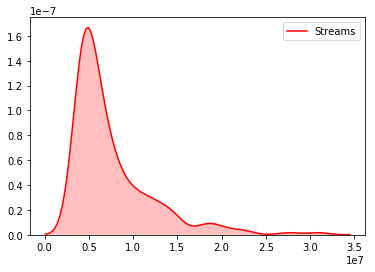

In [30]:
#Kernel Density Estimate Plot- No of Streams
ax = sns.kdeplot(df["Streams"], shade=True, color="r")
plt.show()

<p><strong>According to the kernel density estimate above, the majority of the songs who make it to the global top 200 weekly have nearly 0.5(half) million streamings per week as observed from the peak. While the table toppers cross above 2.5 million streams per week.&nbsp;</strong></p>

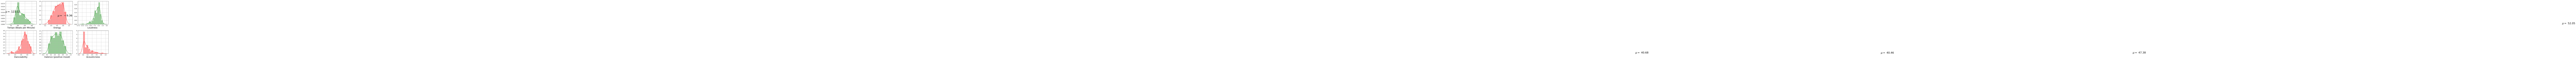

In [94]:
plt.figure(1, figsize=(13, 10),)

hfont = {'fontname':'Dejavu Sans'}

plt.subplot(331)
sns.distplot(df["tempo"],color = "g");
plt.text(10, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Tempo (Beats per Minute)', fontsize=18, **hfont)
plt.grid(True)


plt.subplot(332)
sns.distplot(df["energy"],color = "r");
plt.text(85, .010, r'$\mu=\ 52.05$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df["loudness"],color = "g");
plt.text(-30, 0.10, r'$\mu=\ -9.36$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df["danceability"],color = "r");
plt.text(70, 0.02, r'$\mu=\ 47.38$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df["valence"],color = "g");
plt.text(80, 0.01, r'$\mu=\ 40.68$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(336)
sns.distplot(df["acousticness"],color = "r");
plt.text(80, 0.02, r'$\mu=\ 40.46$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout()
plt.show()

<h3>Insights:- </h3>
<p>1) According to the histogram distribution plots above, this week people have preferred songs which are highly energetic, songs which are most of suitable for dancing with high valence coefficient.</p>
<p>2) There seems to be a diverse community of music lovers for some of them preferred loud music with more number of beats per minute ratio and some preferred the vice-versa combination.</p>
<p>3) It is quite evident from the distribution plot that majority of the listeners prefer acousticness in the music to be low.&nbsp;</p>

In [93]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = df["valence"]  
x2 = df["energy"]  
x3 = df["liveness"] 
x4 = df["danceability"]
x6 = df["valence"]

# Group data together
hist_data = [x1, x2, x3, x4,x6]

group_labels = ["acousticness", "energy", "liveness", "danceability","valence"]

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

<h3><em>Let us dig deeper into these song attributes and understand a bit more about their one to one correlations.&nbsp;</em></h3>

In [36]:
#Let us take into account only the significant variables
x = df[df.columns.difference(['Streams','Track Name','Artist','time_signature'])]

In [37]:
x.describe()

,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.178080,0.698795,216.355000,0.647620,0.003073,4.865000,0.154313,-5.916660,0.650000,0.105994,118.151040,0.495708
std,0.191863,0.134720,38.632777,0.147139,0.019042,3.733156,0.105812,1.975422,0.478167,0.090134,28.852215,0.226943
min,0.000239,0.258000,95.000000,0.292000,0.000000,0.000000,0.021500,-14.861000,0.000000,0.023200,54.747000,0.059100
25%,0.029025,0.636500,191.750000,0.536750,0.000000,1.000000,0.091850,-6.912500,0.000000,0.045425,96.002500,0.312250
50%,0.110000,0.720500,213.000000,0.661000,0.000000,5.000000,0.114500,-5.518000,1.000000,0.075100,109.389000,0.499000
75%,0.246000,0.783500,234.000000,0.766500,0.000018,8.000000,0.179000,-4.497250,1.000000,0.130250,138.515000,0.669250
max,0.889000,0.936000,349.000000,0.909000,0.210000,11.000000,0.742000,-1.715000,1.000000,0.482000,191.702000,0.966000


In [38]:
#Correlation between the features
corr_x = x.corr()

In [39]:
#Correlation Matrix
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_x.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
acousticness,1,-0.042,-0.084,-0.41,-0.074,0.0097,-0.12,-0.21,0.064,-0.086,-0.24,0.071
danceability,-0.042,1,-0.24,0.098,-0.04,-0.086,-0.011,0.23,-0.064,0.16,-0.069,0.44
duration_sec,-0.084,-0.24,1,-0.11,0.047,0.013,0.12,-0.15,0.11,-0.11,0.025,-0.21
energy,-0.41,0.098,-0.11,1,0.097,0.021,0.04,0.68,-0.12,0.0068,0.1,0.4
instrumentalness,-0.074,-0.04,0.047,0.097,1,-0.011,-0.024,-0.016,0.0034,-0.072,0.11,-0.027
key,0.0097,-0.086,0.013,0.021,-0.011,1,0.019,-0.13,-0.18,-0.026,0.048,-0.0065
liveness,-0.12,-0.011,0.12,0.04,-0.024,0.019,1,-0.019,0.0039,0.025,0.012,-0.064
loudness,-0.21,0.23,-0.15,0.68,-0.016,-0.13,-0.019,1,-0.072,-0.16,-0.06,0.47
mode,0.064,-0.064,0.11,-0.12,0.0034,-0.18,0.0039,-0.072,1,-0.083,0.043,-0.077
speechiness,-0.086,0.16,-0.11,0.0068,-0.072,-0.026,0.025,-0.16,-0.083,1,0.21,-0.019


<p><strong>From the correlation matrix shown above, we can observe that no two attributes of a song have collinearity problem. If a song is energetic, it will be louder. This fact seems to be true as it can be seen they possess significant relationship but not too much as loudness is not the only criteria for a song to be energetic.&nbsp;</strong></p>

In [40]:
#Dimensionality Reduction - Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
print(pca.explained_variance_ratio_)

[ 0.63750448  0.35478284]


<h4><strong><i>So, 64% variance was explained by Principal component 1 and 35% was explained by Principal component 2. This shows that we have extracted most of the insights from the dataset in two principal components. </i></strong></h4>

In [42]:
x_pca = pca.fit_transform(x)

In [54]:
#Let's visualize the spread of pca
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

N = 500

trace = go.Scatter(
    x = x_pca[:, 0],
    y = x_pca[:, 1],
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)


data = [trace]

layout = dict(title = 'Styled Scatter',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [43]:
#Support Vector Machines
from sklearn import svm
clf = svm.OneClassSVM(kernel="rbf", gamma=0.001, nu=0.3)
clf.fit(x_pca)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, nu=0.3, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

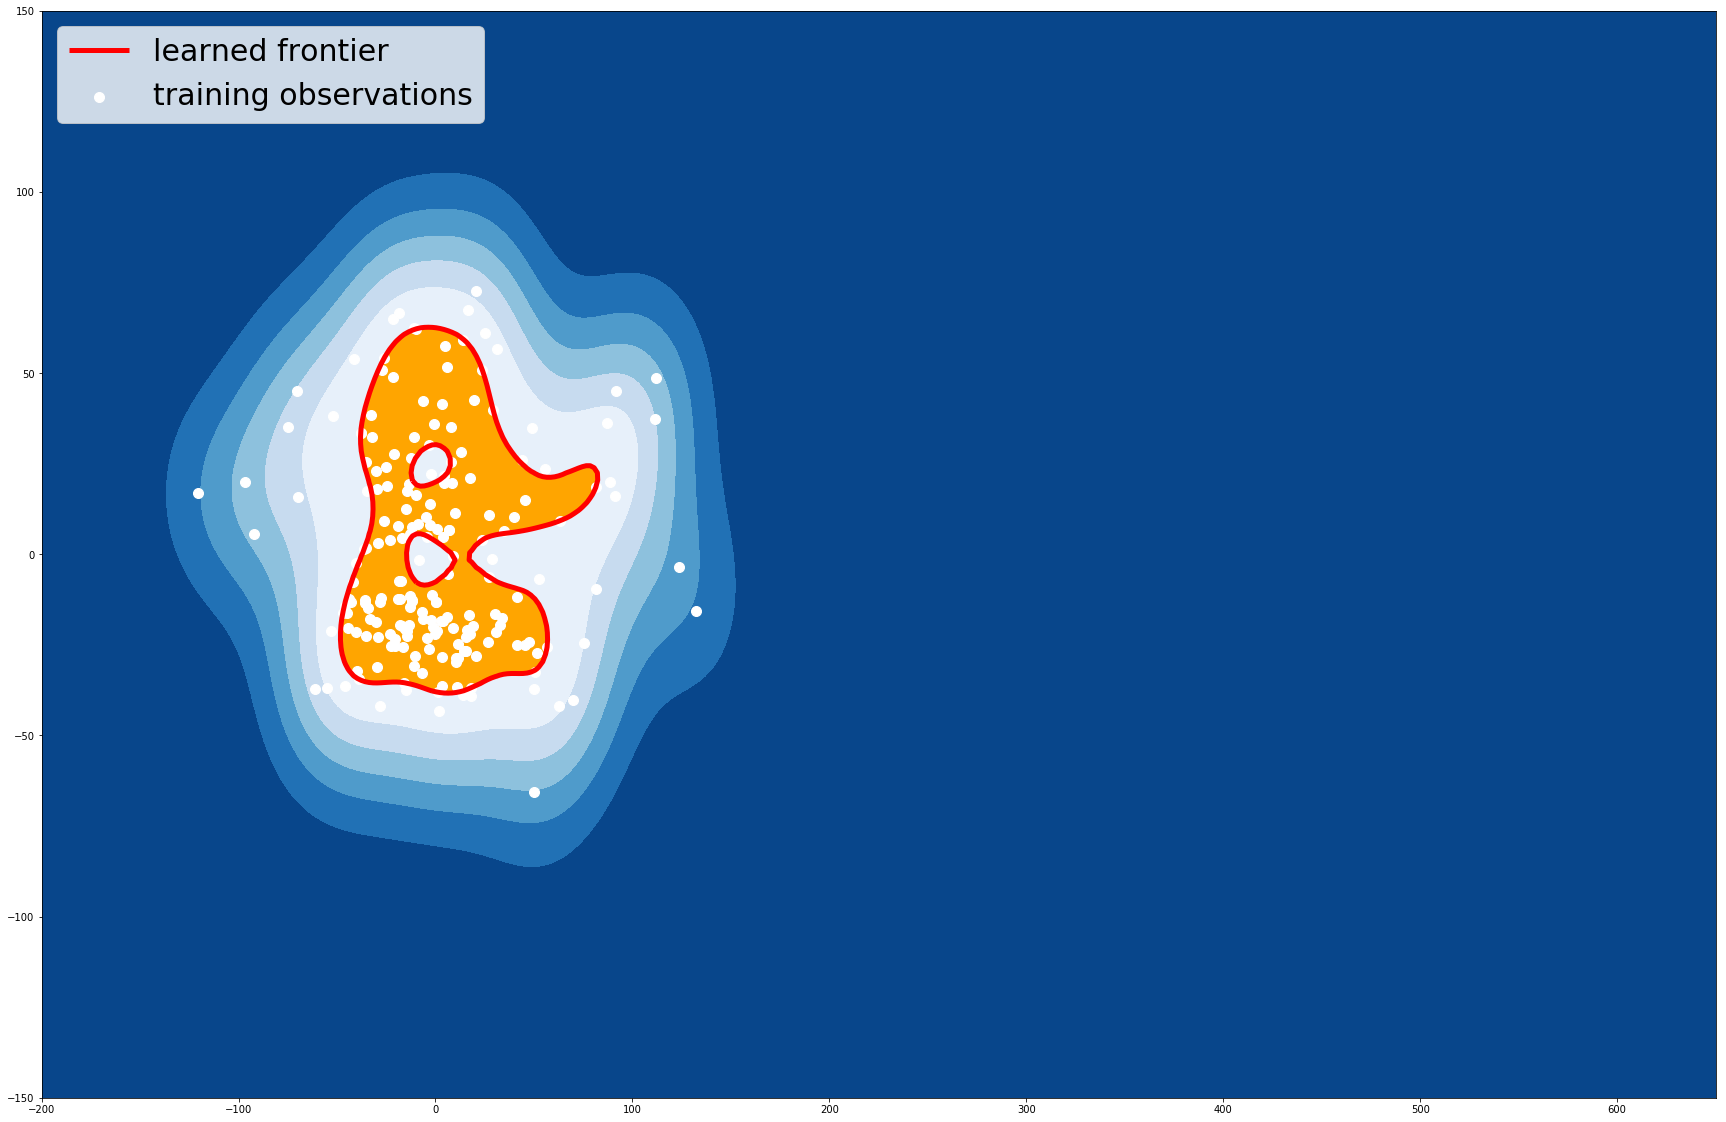

In [51]:
#Outlier Detection
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(30, 20),)
#plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=5, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')



b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='white', s=100)
plt.axis('tight')
plt.xlim((-200, 650))
plt.ylim((-150, 150))

leg = plt.legend([a.collections[0], b1, ],
           ["learned frontier", "training observations"],
           loc="upper left",prop={'size':30}, frameon=True)

plt.show()

<p><strong>For example, if we are interested to know whether any song released can make it to the Global top 200 list based on the last week's song. We would compare if it could fit them inside the orange area. This orange area </strong>represent<strong> the songs which were appreciated the most this week.</strong></p>

In [70]:
#Song Attributes scattered into 3D space
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(
    x=df["instrumentalness"],
    y=df["acousticness"],
    z=df["speechiness"],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=df["tempo"],
    y=df["danceability"],
    z=df["valence"],
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

In [61]:
#Let's do it with vibrant colors
trace1 = go.Scatter3d(
    x=df["danceability"],
    y=df["liveness"],
    z=df["loudness"],
    mode='markers',
    marker=dict(
        size=12,
        color= ['#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6', 
   		  '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    		  '#80B300', '#809900', '#E6B3B3', '#6680B3', '#66991A', 
    		  '#FF99E6', '#CCFF1A', '#FF1A66', '#E6331A', '#33FFCC',
    		  '#66994D', '#B366CC', '#4D8000', '#B33300', '#CC80CC', 
    		  '#66664D', '#991AFF', '#E666FF', '#4DB3FF', '#1AB399',
		  '#E666B3', '#33991A', '#CC9999', '#B3B31A', '#00E680', 
		  '#4D8066', '#809980', '#E6FF80', '#1AFF33', '#999933',
		  '#FF3380', '#CCCC00', '#66E64D', '#4D80CC', '#9900B3', 
		  '#E64D66', '#4DB380', '#FF4D4D', '#99E6E6', '#6666FF'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [64]:
#Scientific Plots
import plotly.plotly as py
import plotly.figure_factory as FF
from plotly.graph_objs import graph_objs

import numpy as np
from scipy.spatial import Delaunay

u = df["danceability"]
v = df["tempo"]
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

x = (3 + (np.cos(v)))*np.cos(u)
y = (3 + (np.cos(v)))*np.sin(u)
z = np.sin(v)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig1 = FF.create_trisurf(x=x, y=y, z=z,
                         simplices=simplices,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))
py.iplot(fig1)

In [66]:
#Saving the cleaned data
df.to_csv("spotifier.csv")